### Project 5
#### Time Series Forecasting for S&P Data on the below stocks
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
# Set the working directory
import os
os.chdir('D:\DATASCIENCE\ACADEMY\Course Material\Machine Learning\ML9_Clustering')
os.getcwd()

'D:\\DATASCIENCE\\ACADEMY\\Course Material\\Machine Learning\\ML9_Clustering'

In [2]:
# Import required libraries
% matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# plt.style.available()
# plt.style.use()

path = os.getcwd()+ '\\data_stocks.csv'
stock_data = pd.read_csv(path)
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
import warnings
warnings.filterwarnings('ignore')

stock_data['DATE'] = stock_data['DATE'].convert_objects(convert_dates = 'coerce')
stock_data = stock_data.sort_index(by = 'DATE')
stock_data = stock_data.set_index('DATE')

##### Lets forecaste for 
1. NASDAQ.EBAY

Text(0.5,1,'NASDAQ.EBAY')

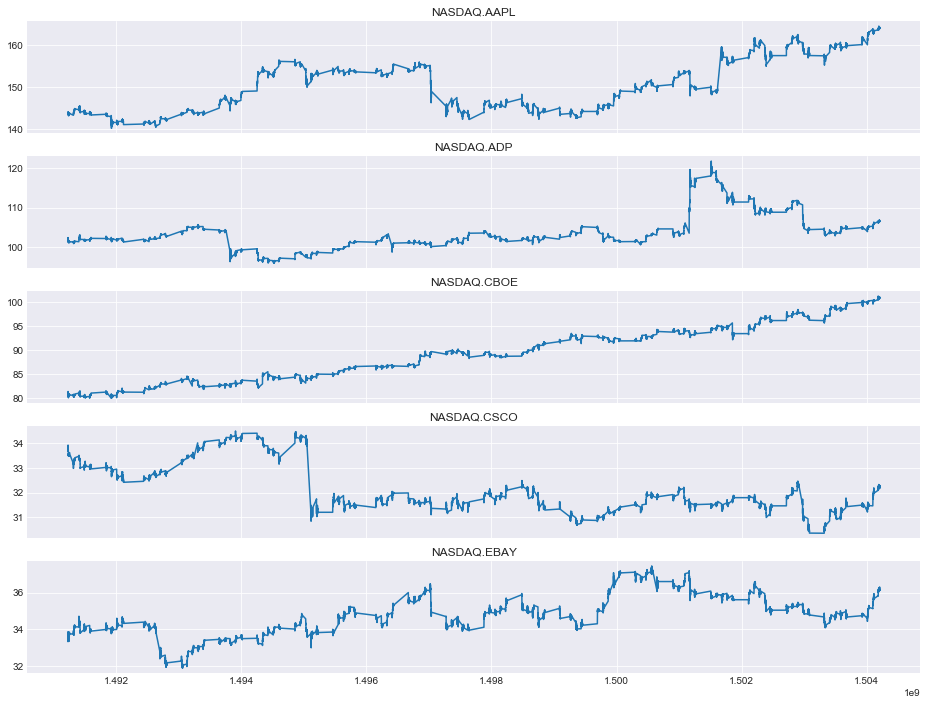

In [4]:
fig, axs = plt.subplots(5,1,figsize=(16,12),sharex=True)
axs[0].plot(stock_data['NASDAQ.AAPL'])
axs[0].set_title('NASDAQ.AAPL')
axs[1].plot(stock_data['NASDAQ.ADP'])
axs[1].set_title('NASDAQ.ADP')
axs[2].plot(stock_data['NASDAQ.CBOE'])
axs[2].set_title('NASDAQ.CBOE')
axs[3].plot(stock_data['NASDAQ.CSCO'])
axs[3].set_title('NASDAQ.CSCO')
axs[4].plot(stock_data['NASDAQ.EBAY'])
axs[4].set_title('NASDAQ.EBAY')

from the above graphs we observe that all the 5 selected stocks have some components of time series and the data is non stationary

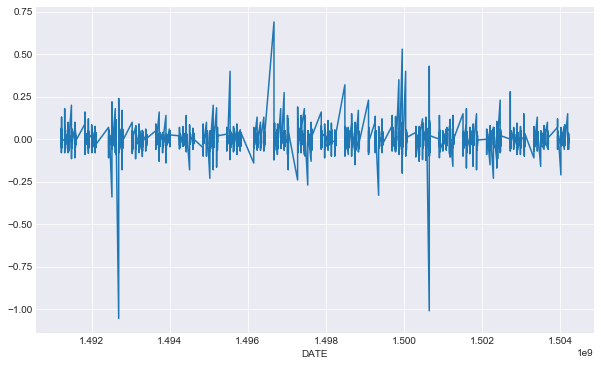

In [5]:
# Take a difference t - (t-1) to make it stationary
stock_data['First_Diff'] = stock_data['NASDAQ.EBAY'] - stock_data['NASDAQ.EBAY'].shift()
stock_data['First_Diff'].plot(figsize=(10,6))

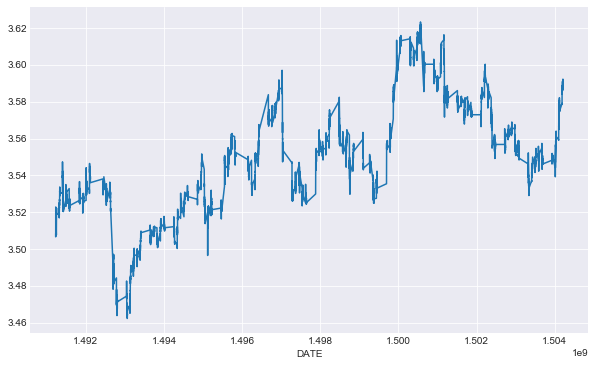

In [6]:
# Take the log of column and check for stationarity
stock_data['Natural_log'] = stock_data['NASDAQ.EBAY'].apply(lambda x: np.log(x))
stock_data['Natural_log'].plot(figsize=(10,6))

So that gives us the original closing price with a log transform applied to “flatten” the data from an exponential curve to a linear curve. One way to visually see the effect that the log transform had is to analyze the variance over time. We can use a rolling variance statistic and compare both the original series and the logged series.

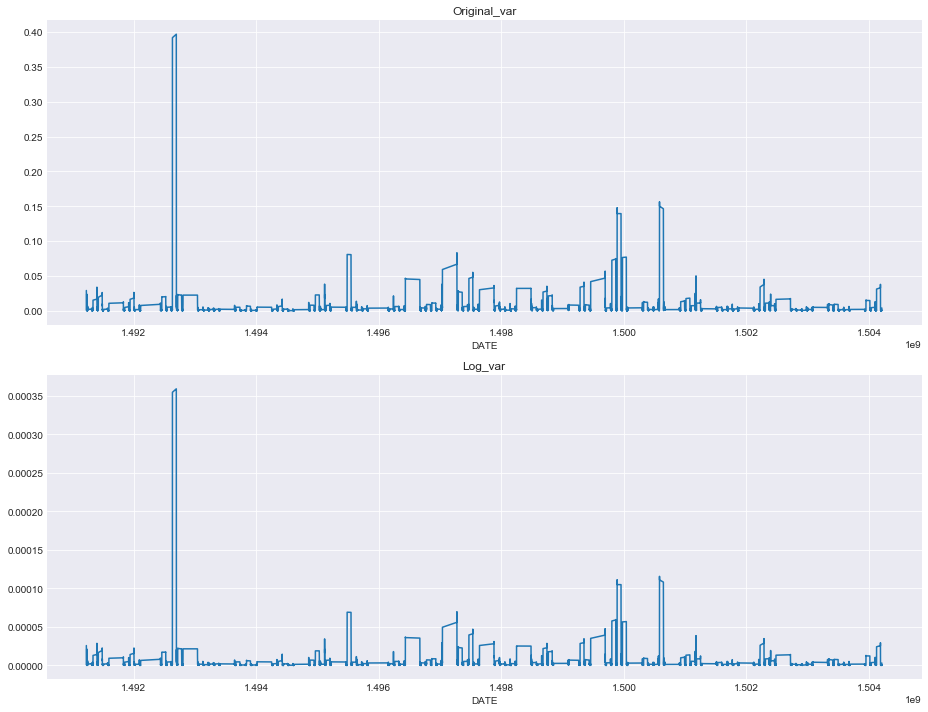

In [7]:
stock_data['Original_var'] = stock_data['NASDAQ.EBAY'].rolling(30, min_periods=None,center=True).var()
stock_data['Log_var'] = stock_data['Natural_log'].rolling(30, min_periods=None,center=True).var()

fig, ax = plt.subplots(2 ,1, figsize=(13,10))
stock_data['Original_var'].plot(ax = ax[0], title = 'Original_var')
stock_data['Log_var'].plot(ax= ax[1], title = 'Log_var')
fig.tight_layout()

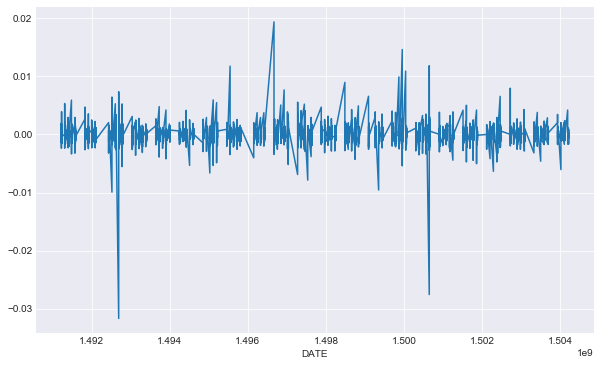

In [8]:
stock_data['Logged_first_diff'] = stock_data['Natural_log'] - stock_data['Natural_log'].shift()
stock_data['Logged_first_diff'].plot(figsize=(10,6))

Much better! We now have a stationary time series model of daily changes to the S&P 500 index. Now let’s create some lag variables y(t-1), y(t-2) etc. and examine their relationship to y(t). We’ll look at 1 and 2-day lags along with weekly and monthly lags to look for “seasonal” effects.

In [9]:
stock_data['Lag 1'] = stock_data['Logged_first_diff'].shift()  
stock_data['Lag 2'] = stock_data['Logged_first_diff'].shift(2)  
stock_data['Lag 5'] = stock_data['Logged_first_diff'].shift(5)  
stock_data['Lag 30'] = stock_data['Logged_first_diff'].shift(30)

One interesting visual way to evaluate the relationship between lagged variables is to do a scatter plot of the original variable vs. the lagged variable and see where the distribution lies. We can do this with a joint plot using the seaborn package.

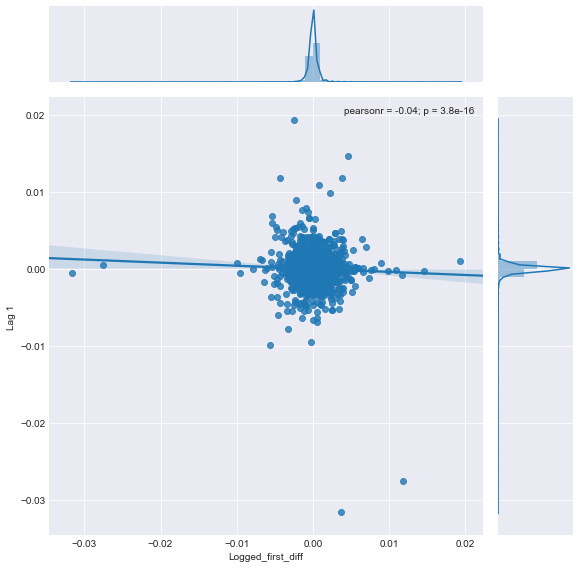

In [10]:
sns.jointplot('Logged_first_diff','Lag 1', data = stock_data,kind='reg',size=8)

Notice how tightly packed the mass is around 0. It also appears to be pretty evenly distributed — the marginal distributions on both axes are roughly normal. This seems to indicate that knowing the index value one day doesn’t tell us much about what it will do the next day.

It probably comes as no surprise that there’s very little correlation between the change in value from one day to the next. Although I didn’t plot them out here, the other lagged variables that we created above show similar results. There could be a relationship to other lag steps that we haven’t tried, but it’s impractical to test every possible lag value manually. Fortunately there is a class of functions that can systematically do this for us.

In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(stock_data['Logged_first_diff'].iloc[1:])
lag_partial_correlations = pacf(stock_data['Logged_first_diff'].iloc[1:])

The auto-correlation function computes the correlation between a variable and itself at each lag step up to some limit (in this case 40). The partial auto-correlation function computes the correlation at each lag step that is NOT already explained by previous, lower-order lag steps. We can plot the results to see if there are any significant correlations.

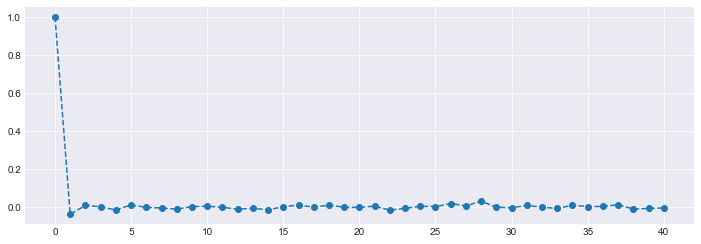

In [12]:
fig, ax = plt.subplots(figsize=(12,4))  
ax.plot(lag_correlations, marker='o', linestyle='--')

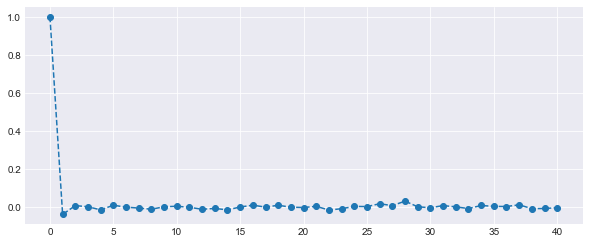

In [13]:
fig, ax = plt.subplots(figsize=(10,4))  
ax.plot(lag_partial_correlations, marker='o', linestyle='--')

The auto-correlation and partial-autocorrelation results are very close to each other (I only plotted the auto-correlation results above). What this shows is that there is no significant (> 0.2) correlation between the value at time t and at any time prior to t up to 40 steps behind. In order words, the series is a random walk.

Another interesting technique we can try is a decomposition. This is a technique that attempts to break down a time series into trend, seasonal, and residual factors. Statsmodels comes with a decompose function out of the box.

<Figure size 1152x432 with 0 Axes>

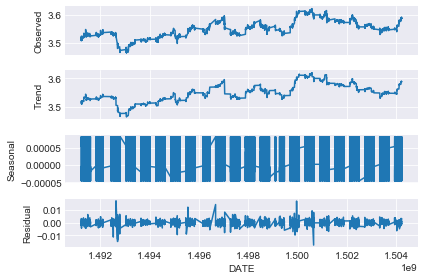

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(stock_data['Natural_log'], model='additive', freq=30)  
fig = plt.figure(figsize = (16,6))  
fig = decomposition.plot()

Since we don’t see any real cycle in the data, the visualization is not that effective in this case. For data where this is a strong seasonal pattern though it can be very useful. The folling instance, for example, is a sample from the statsmodels documentation showing CO2 emissions data over time.

Going back to our stock data, we’re already observed that it’s a random walk and that our lagged variables don’t seem to have much impact, but we can still try fitting some ARIMA models and see what we get. Let’s start with a simple moving average model.

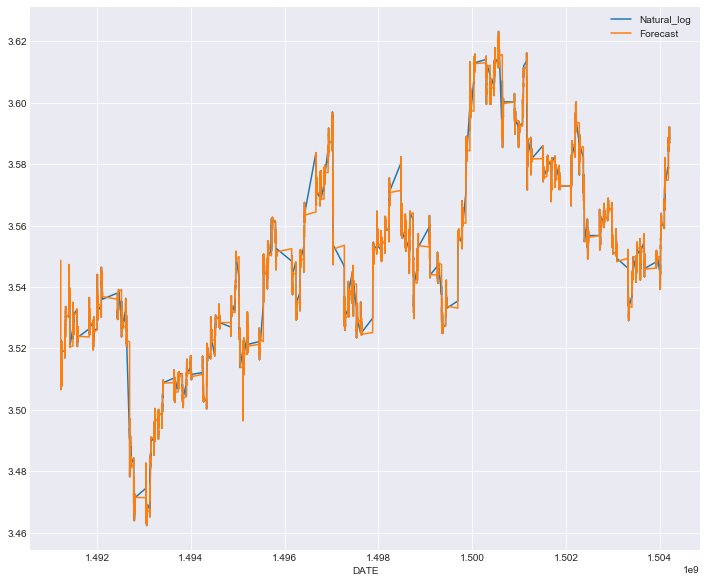

In [15]:
model = sm.tsa.ARIMA(stock_data['Natural_log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Natural_log', 'Forecast']].plot(figsize=(12, 10))

So at first glance it seems like this model is doing pretty well. But although it appears like the forecasts are really close (the lines are almost indistinguishable after all), remember that we used the un-differenced series! The index only fluctuates a small percentage day-to-day relative to the total absolute value. What we really want is to predict the first difference, or the day-to-day moves. We can either re-run the model using the differenced series, or add an “I” term to the ARIMA model (resulting in a (1, 1, 0) model) which should accomplish the same thing. Let’s try using the differenced series.

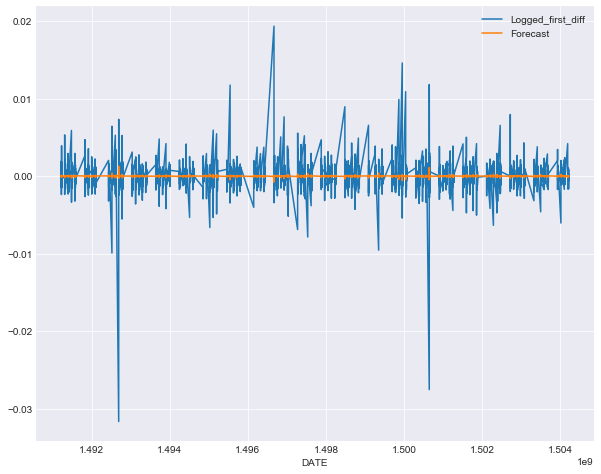

In [16]:
model = sm.tsa.ARIMA(stock_data['Logged_first_diff'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged_first_diff', 'Forecast']].plot(figsize=(10, 8))

It’s a little hard to tell, but it appears like our forecasted changes are generally much smaller than the actual changes. It might be worth taking a closer look at a subset of the data to see what’s really going on.

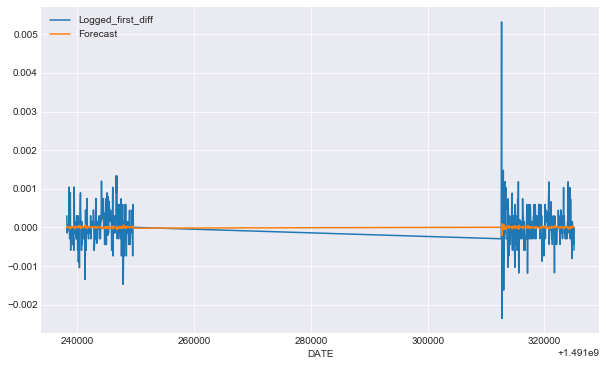

In [17]:
stock_data[['Logged_first_diff', 'Forecast']].iloc[200:600, :].plot(figsize=(10, 6))

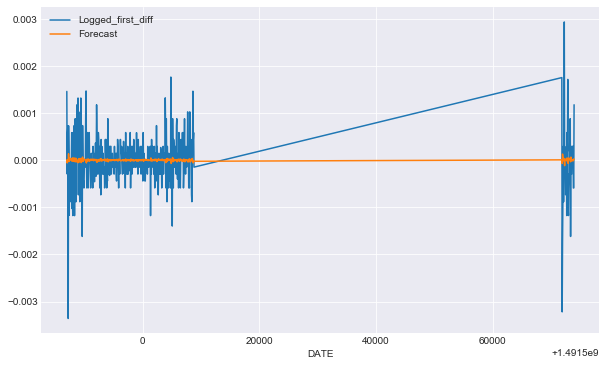

In [18]:
stock_data[['Logged_first_diff', 'Forecast']].iloc[1200:1600, :].plot(figsize=(10, 6))

So now it’s pretty obvious that the forecast is way off. We’re predicting tiny little variations relative to what is actually happening day-to-day. Again, this is more of less expected with a simple moving average model of a random walk time series. There’s not enough information from the previous days to accurately forcast what’s going to happen the next day.

A moving average model doesn’t appear to do so well. What about an exponential smoothing model? Exponential smoothing spreads out the impact of previous values using an exponential weighting, so things that happened more recently are more impactful than things that happened a long time ago. Maybe this “smarter” form of averaging will be more accurate?

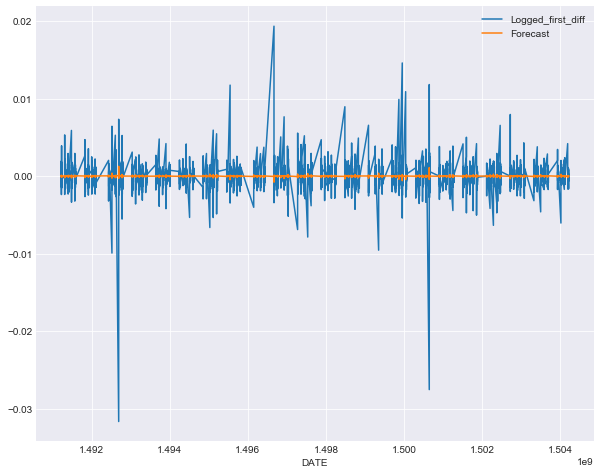

In [19]:
model = sm.tsa.ARIMA(stock_data['Logged_first_diff'].iloc[1:], order=(0, 0, 1))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged_first_diff', 'Forecast']].plot(figsize=(10, 8))

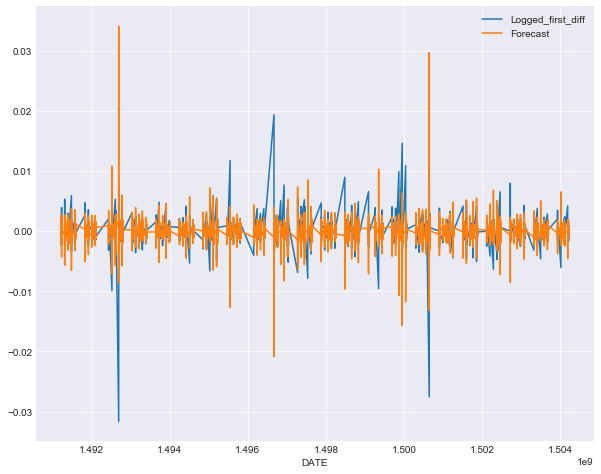

In [20]:
model = sm.tsa.ARIMA(stock_data['Logged_first_diff'].iloc[1:], order=(1, 1, 1))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged_first_diff', 'Forecast']].plot(figsize=(10, 8))

In [21]:
print(results.aic, results.bic, results.hqic)

-486130.8336354482 -486096.3226525357 -486119.92589062505


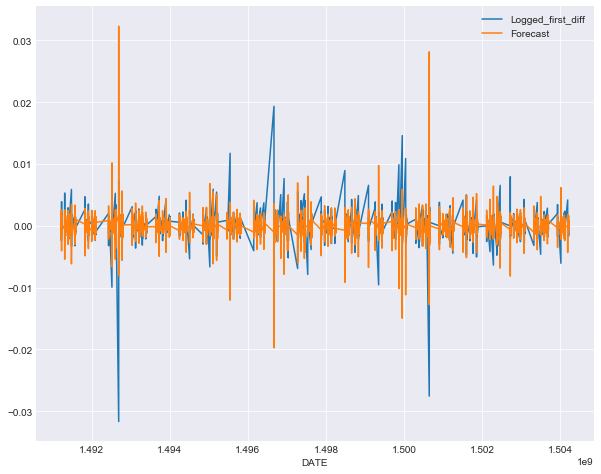

In [22]:
model = sm.tsa.ARIMA(stock_data['Logged_first_diff'].iloc[1:], order=(1, 1, 2))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged_first_diff', 'Forecast']].plot(figsize=(10, 8))

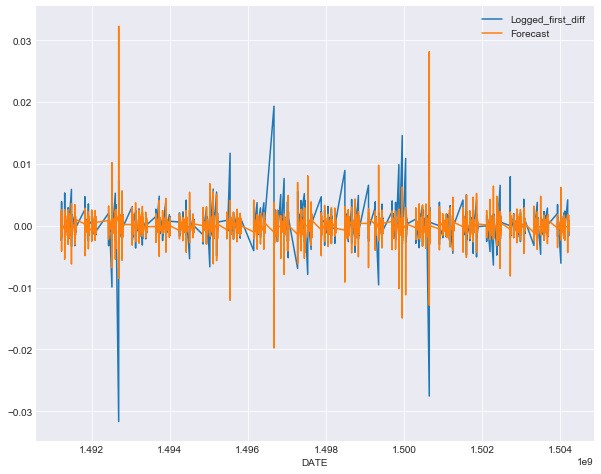

In [23]:
model = sm.tsa.ARIMA(stock_data['Logged_first_diff'].iloc[1:], order=(2, 1, 1))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged_first_diff', 'Forecast']].plot(figsize=(10, 8))

In [24]:
print(results.aic, results.bic, results.hqic)

-486004.33842856827 -485961.19969992765 -485990.7037475393
